<a href="https://colab.research.google.com/github/JCaballerot/Programacion_en_Python/blob/main/modulo6/Graficos_en_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ctic.uni.edu.pe/wp-content/uploads/2022/04/588px-x-348px-web-1.png" alt="HTML5 Icon" width="900" height="350" >

<h1 align=center><font size = 5> UNIDAD VI - GRÁFICOS EN PYTHON
</font></h1>

---

In [3]:
# Principales imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [56]:
# Leyendo archivo csv

pddf = pd.read_csv('sample_data/california_housing_train.csv')
pddf2 = pd.read_csv('train_titanic.csv')


In [63]:
pddf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Scatterplot

In [64]:
x = pddf.households
y = pddf.median_house_value

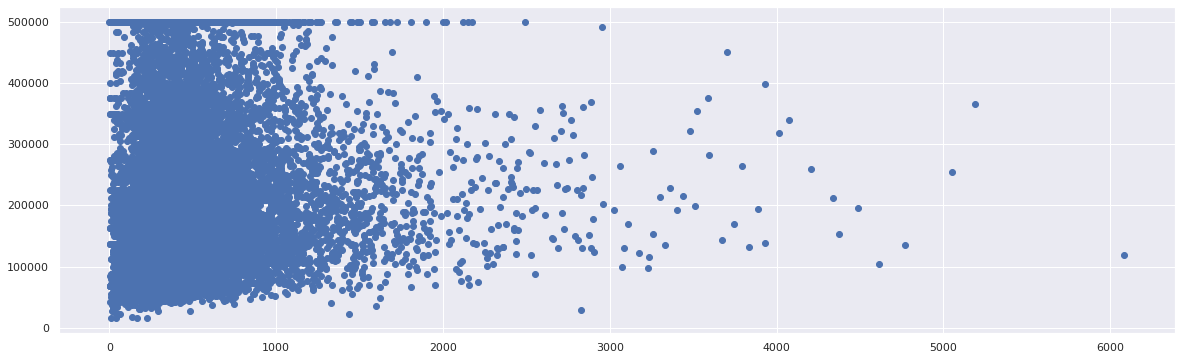

In [65]:
# plot
fig, ax = plt.subplots()
ax.scatter(x, y)

### Mejorar el gráfico con una muestra

In [ ]:
# Tomar una muestra de los datos
x = pddf.sample(1000).households
y = pddf.sample(1000).median_house_value

# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
plt.rcParams["figure.figsize"] = (8, 6)
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

#Labels
plt.title("Scatterplot", fontsize = 20)
plt.xlabel('households')
plt.ylabel('median house value')

#Guardar gráfico
plt.savefig("scatterplot_1.jpg")

#Mostrar gráfico
plt.show()

### Mejorar el gráfico con transparencia

In [ ]:
# Tomar una muestra de los datos
x = pddf.households
y = pddf.median_house_value

# plot
fig, ax = plt.subplots()
ax.scatter(x, y, alpha = 0.2)

plt.show()

### Seaborn

In [68]:
import seaborn as sns

In [ ]:
sns.relplot(data = pddf, x="households", y="median_house_value", height=6, aspect=11.7/8.27)

In [ ]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.regplot(data = pddf.sample(1000), x="households", y="median_house_value", 
            scatter_kws={'alpha':0.3}, fit_reg = True)

In [ ]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.regplot(data = pddf2, x="Age", y="Fare", scatter_kws = {'alpha': 0.5})

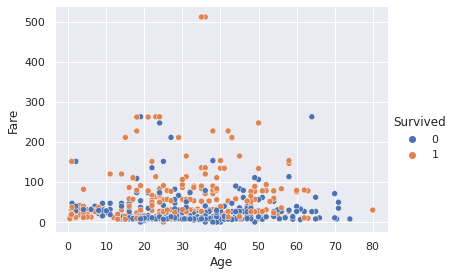

In [72]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.relplot(data = pddf2, x="Age", y="Fare", hue="Survived", height=4, aspect=11.7/8.27)

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="households", y="median_house_value", data=pddf,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [ ]:
pddf.dtypes

In [79]:
features = list(set(pddf.columns.tolist()) - set(['longitude', 'latitude']))

In [ ]:
import time

start = time.time()
for col1 in features:
  for col2 in features:
    if col1 != col2:
      print(f'Graficando {col1} y {col2}')
      sns.jointplot(x=col1, y=col2, data=pddf, kind="reg", truncate=False, color="m", height=7).savefig(f"graficos/scatter_{col1}_{col2}.jpg")
elapsed = time.time() - start
print(f'Serial process elapsed: {elapsed} seconds')
#90 seconds



In [96]:
lista_1 = []
lista_2 = []

for col1 in features:
  for col2 in features:
    if col1 != col2:
      lista_1.append(col1)
      lista_2.append(col2)


In [ ]:
pd.DataFrame({'col1' : lista_1,
              'col2' : lista_2})

In [ ]:
start = time.time()
[sns.jointplot(x=col1, y=col2, data=pddf, kind="reg", truncate=False, color="m", height=7).savefig(f"graficos/scatter_{col1}_{col2}.jpg") for col1, col2 in zip(lista_1, lista_2)]
elapsed = time.time() - start
print(f'Parallel process elapsed: {elapsed} seconds')

# Histograma

In [ ]:
# plot:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10, 6)

ax.hist(pddf.median_house_value, bins='auto', edgecolor="white")


In [ ]:
# plot:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10, 6)
ax.hist(pddf.median_house_value, bins='auto', edgecolor="white", cumulative=True)

In [ ]:
sns.histplot(data=pddf, x="median_house_value", kde = True)

In [ ]:
sns.histplot(data=pddf, x="median_house_value", kde=True, cumulative=True)

# Lineas

In [ ]:
covid = pd.read_csv('positivos_covid.csv', delimiter = ';')
covid.head()

In [ ]:
covid['MES_RESULTADO'] = covid.FECHA_RESULTADO.apply(lambda x: str(x)[:6])
covid.head()

In [ ]:
df = covid.groupby("MES_RESULTADO")[["id_persona"]].aggregate(['count']).reset_index()
df.columns = df.columns.droplevel(-1)
df.head()

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20, 6)
sns.lineplot(x="MES_RESULTADO", y="id_persona", data=df)
plt.xticks(rotation=90)


In [ ]:
df = covid.groupby(["MES_RESULTADO", "SEXO"])[["id_persona"]].aggregate(['count']).reset_index()
df.columns = df.columns.droplevel(-1)
df.head()

In [ ]:
plt.rcParams["figure.figsize"] = (20, 6)
sns.lineplot(x="MES_RESULTADO", y="id_persona", hue = 'SEXO', data=df)

# Barras

In [12]:
res = covid.groupby("DEPARTAMENTO")[["id_persona"]].aggregate(['count']).reset_index()
res.columns = res.columns.droplevel(-1)
res.sort_values(by = 'id_persona', ascending = False, inplace = True)

In [13]:
res.head()

,DEPARTAMENTO,id_persona
14,LIMA,1224827
3,AREQUIPA,187678
19,PIURA,136173
12,LA LIBERTAD,106920
6,CALLAO,100888


In [ ]:
plt.bar(res.DEPARTAMENTO, res.id_persona)
plt.xticks(rotation=90)

In [ ]:
plt.barh(res.DEPARTAMENTO, res.id_persona, align='center', alpha=0.5)

# Areas

In [18]:
res = covid.groupby("SEXO")[["id_persona"]].aggregate(['count']).reset_index()
res.columns = res.columns.droplevel(-1)
res.sort_values(by = 'id_persona', ascending = False, inplace = True)

In [ ]:
plt.pie(res.id_persona, labels=res.SEXO)


# Cajas

In [ ]:
datos = [2, 3, 3, 3, 4, 5, 6, 7, 7.5, 8, 8]

len(datos)
print(f'la mediana es: {np.percentile(datos, 50)}')
print(f'el cuartil 1 es: {np.percentile(datos, 25)}')
print(f'el cuartil 3 es: {np.percentile(datos, 75)}')

print(f'el promedio es: {np.mean(datos)}')


In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=covid.EDAD, orient="h")

In [ ]:
covid.EDAD.describe()

In [35]:
Me = np.percentile(covid.EDAD.dropna(), 50)
Q1 = np.percentile(covid.EDAD.dropna(), 25)
Q3 = np.percentile(covid.EDAD.dropna(), 75)
RIC = Q3 - Q1
LI = Q1 - 1.5*RIC
LS = Q3 + 1.5*RIC

In [ ]:
LS

In [38]:
covid['EDAD_t'] = covid.EDAD.apply(lambda x: LS if x > LS else x)

In [ ]:
covid.head()

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=covid.EDAD_t, orient="h")

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=covid.EDAD_t, x = covid.SEXO, orient="v")

# Contorno

In [ ]:

# Creating 2-D grid of features
[X, Y] = np.meshgrid(pddf.longitude, pddf.latitude)
fig, ax = plt.subplots(1, 1)
Z = X ** 2 + Y

ax.contourf(X, Y, Z)
